In [124]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [125]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")
original_df = market_data_df.copy()

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [126]:
# Generate summary statistics
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


### Prepare the Data

In [127]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(market_data_df)
market_data_scaled

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [128]:
market_data_df.index.values

array(['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash',
       'binancecoin', 'chainlink', 'cardano', 'litecoin',
       'bitcoin-cash-sv', 'crypto-com-chain', 'usd-coin', 'eos', 'monero',
       'tron', 'tezos', 'okb', 'stellar', 'cosmos', 'cdai', 'neo',
       'wrapped-bitcoin', 'leo-token', 'huobi-token', 'nem',
       'binance-usd', 'iota', 'vechain', 'zcash', 'theta-token', 'dash',
       'ethereum-classic', 'ethlend', 'maker', 'havven', 'omisego',
       'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd',
       'digibyte'], dtype=object)

In [129]:
# Create a DataFrame with the scaled data
market_data_df_scaled = pd.DataFrame(market_data_scaled,
                                     columns=["price_change_percentage_24h",
                                              "price_change_percentage_7d",
                                              "price_change_percentage_14d",
                                              "price_change_percentage_30d",
                                              "price_change_percentage_60d",
                                              "price_change_percentage_200d",
                                              "price_change_percentage_1y"])

# Copy the crypto names from the original data
crypto_names = market_data_df.index.values

# Set the coinid column as index
#market_data_df.reset_index(inplace=True)
market_data_df_scaled["coin_id"] = crypto_names
market_data_df_scaled.set_index("coin_id", inplace=True)

# Display sample data
market_data_df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [130]:
print(crypto_names)
print(market_data_df.columns)

['bitcoin' 'ethereum' 'tether' 'ripple' 'bitcoin-cash' 'binancecoin'
 'chainlink' 'cardano' 'litecoin' 'bitcoin-cash-sv' 'crypto-com-chain'
 'usd-coin' 'eos' 'monero' 'tron' 'tezos' 'okb' 'stellar' 'cosmos' 'cdai'
 'neo' 'wrapped-bitcoin' 'leo-token' 'huobi-token' 'nem' 'binance-usd'
 'iota' 'vechain' 'zcash' 'theta-token' 'dash' 'ethereum-classic'
 'ethlend' 'maker' 'havven' 'omisego' 'celsius-degree-token' 'ontology'
 'ftx-token' 'true-usd' 'digibyte']
Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


### Find the Best Value for k Using the Original Scaled DataFrame.

In [131]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(market_data_df_scaled)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

,k,inertia
0,1,287.000000
1,2,235.816943
2,3,123.190482
3,4,79.022435
4,5,66.468717
5,6,53.617387
6,7,46.035250
7,8,45.272662
8,9,36.800694
9,10,30.958187


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

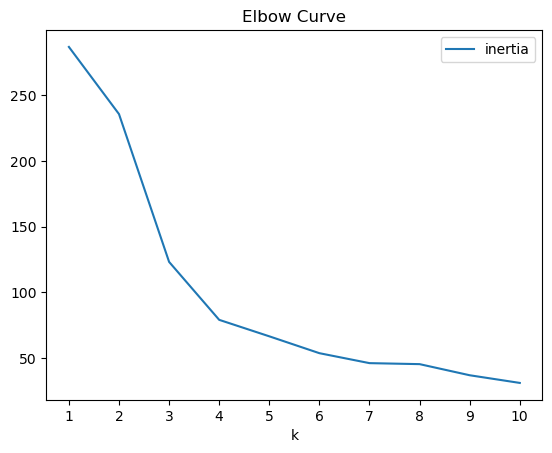

In [132]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(
    x= "k",
    y= "inertia",
    title= "Elbow Curve",
    xticks= k
)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**  Looking at the line plot it appears that 4 clusters is a good 
candidate.  

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [133]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [134]:
# Fit the K-Means model using the scaled data
model.fit(market_data_df_scaled)

c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [135]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(market_data_df_scaled)

# View the resulting array of cluster values.
crypto_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 0, 0, 3, 0, 2, 2, 0])

In [136]:
# Create a copy of the DataFrame
market_data_predictions = market_data_df_scaled.copy()

In [137]:
# Add a new column to the DataFrame with the predicted clusters
market_data_predictions["crypto_cluster"] = crypto_clusters

# Display sample data
market_data_predictions.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

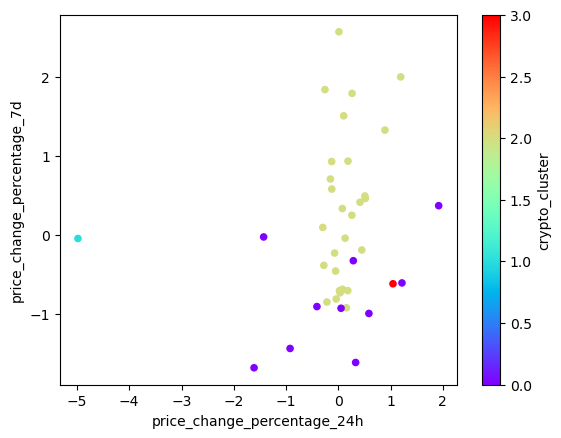

In [138]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_predictions.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="crypto_cluster",
    colormap="rainbow"
)

### Optimize Clusters with Principal Component Analysis.

In [139]:
# Create a PCA model instance and set `n_components=3`.
model_pca = PCA(n_components=3)

In [140]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca = model_pca.fit_transform(market_data_df_scaled)

# View the first five rows of the DataFrame. 
crypto_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [141]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
model_pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** It is almost 89% of the original 

In [142]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
crypto_pca_df = pd.DataFrame(
    crypto_pca,
    columns=["PCA1","PCA2","PCA3"]
)

# Copy the crypto names from the original data
crypto_pca_df["coin_id"] = crypto_names

# Set the coinid column as index
crypto_pca_df.set_index("coin_id", inplace=True)

# Display sample data
crypto_pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [143]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i)
    k_model.fit(crypto_pca_df)
    inertia.append(k_model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head(10)

c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,93.774626
3,4,49.665497
4,5,38.352251
5,6,31.464493
6,7,23.827147
7,8,20.426424
8,9,13.731947
9,10,11.407667


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

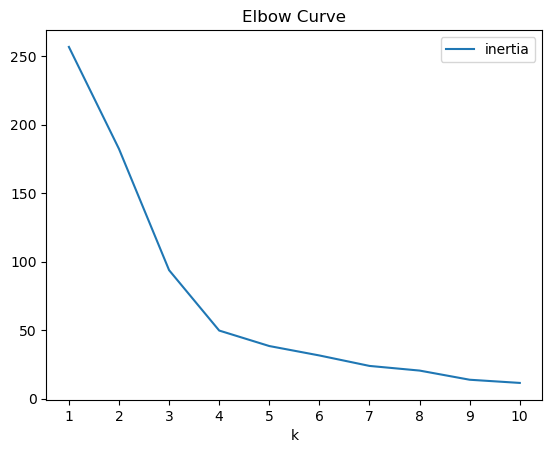

In [144]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**  The best value for "k" is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The best k value matches the one from the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [145]:
# Initialize the K-Means model using the best value for k
model_k = KMeans(n_clusters=4)

In [146]:
# Fit the K-Means model using the PCA data
model_k.fit(crypto_pca_df)

c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [147]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_pca_clusters = model_k.predict(crypto_pca_df)

# Print the resulting array of cluster values.
print(crypto_pca_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [148]:
# Create a copy of the DataFrame with the PCA data
crypto_pca_predictions = crypto_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_pca_predictions["crypto_cluster"] = crypto_clusters

# Display sample data
crypto_pca_predictions.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

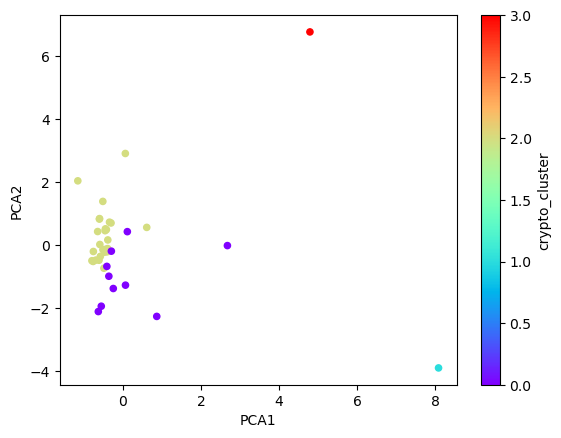

In [149]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
crypto_pca_predictions.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="crypto_cluster",
    colormap="rainbow"
)

### Determine the Weights of Each Feature on each Principal Component

In [150]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(model_pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=market_data_df_scaled.columns)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
PCA1: price_change_percentage_200d and price_change_percentage_1y have the strongest positive influence, while price_change_percentage_24h has the strongest negative influence.

PCA2: price_change_percentage_14d and price_change_percentage_30d have the strongest positive influence, while price_change_percentage_1y has the strongest negative influence.

PCA3: price_change_percentage_7d has the strongest positive influence, while price_change_percentage_60d and price_change_percentage_24h has the strongest negative impact.



    